In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
ms = pd.read_csv('../Datasets/US_Shootings/US_Shootings.csv', parse_dates=True)

In [5]:
ms

,Date,City,State,Dead,Injured,Total,Description
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par..."
...,...,...,...,...,...,...,...
2642,1933-06-17,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...
2643,1929-12-25,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...
2644,1929-02-14,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...
2645,1927-11-21,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...


In [6]:
ms.isna().sum()

Date           0
City           0
State          5
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

In [7]:
ms = ms[ms['State'].notna()]

In [8]:
ms.isna().sum()

Date           0
City           0
State          0
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

In [19]:
state_incidents = ms.groupby('State').size().sort_values(ascending=False)

In [20]:
state_incidents[:10]

State
Illinois        266
California      219
Texas           200
Florida         135
New York        124
Pennsylvania    123
Louisiana       117
Ohio             96
Michigan         87
Georgia          87
dtype: int64

In [21]:
city_incidents = ms.groupby('City').size().sort_values(ascending=False)

In [22]:
city_incidents[:10]

City
Chicago            194
Philadelphia        83
New York City       67
Houston             52
Baltimore           50
New Orleans         40
St. Louis           34
Detroit             34
Washington D.C.     33
Los Angeles         30
dtype: int64

In [23]:
state_casualties = ms.groupby('State').Total.sum().sort_values(ascending=False)

In [24]:
state_casualties[:5]

State
California    1441
Illinois      1396
Texas         1377
Florida        826
New York       677
Name: Total, dtype: int64

In [25]:
import datetime

In [26]:
ms['Date'].dtype

dtype('O')

In [27]:
ms['Date'] = pd.to_datetime(ms['Date'])

In [28]:
ms['Date'].dtype

dtype('<M8[ns]')

In [29]:
ms['Date'].dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
2642    1933
2643    1929
2644    1929
2645    1927
2646    1924
Name: Date, Length: 2642, dtype: int64

In [30]:
ms['Year'] = ms['Date'].dt.year

In [31]:
ms

,Date,City,State,Dead,Injured,Total,Description,Year
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...,2022
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...,2022
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...,2022
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...,2022
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par...",2022
...,...,...,...,...,...,...,...,...
2642,1933-06-17,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...,1933
2643,1929-12-25,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...,1929
2644,1929-02-14,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...,1929
2645,1927-11-21,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...,1927


In [46]:
exclude_2022 = ms[ms['Year']!= 2022]

In [50]:
over_the_yrs = exclude_2022.groupby('Year').size().sort_values(ascending=False)

In [53]:
last_20 = over_the_yrs[:20]

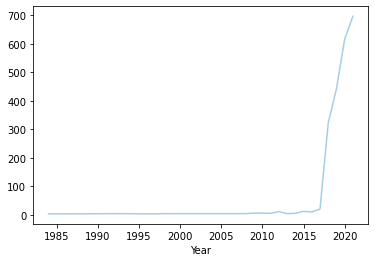

In [70]:
sns.lineplot(x=last_20.index, y=last_20.values);

In [57]:
ms['Month'] = ms['Date'].dt.month

In [58]:
ms

,Date,City,State,Dead,Injured,Total,Description,Year,Month
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...,2022,7
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...,2022,7
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...,2022,7
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...,2022,7
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par...",2022,7
...,...,...,...,...,...,...,...,...,...
2642,1933-06-17,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...,1933,6
2643,1929-12-25,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...,1929,12
2644,1929-02-14,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...,1929,2
2645,1927-11-21,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...,1927,11


In [59]:
months = ms.groupby('Month').Month.count()

In [65]:
sns.set_palette("Paired")

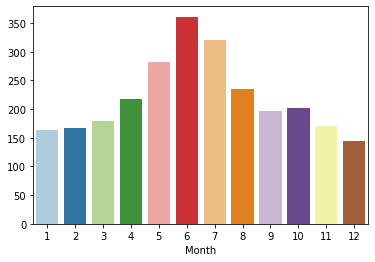

In [66]:
sns.barplot(x=months.index, y=months.values);

In [67]:
US_heat = ms.loc[:, ['Month', 'State', 'Total']]

In [73]:
US_heat.to_csv('../Datasets/US_Shootings/State_heat.csv')

In [71]:
ms

,Date,City,State,Dead,Injured,Total,Description,Year,Month
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...,2022,7
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...,2022,7
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...,2022,7
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...,2022,7
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par...",2022,7
...,...,...,...,...,...,...,...,...,...
2642,1933-06-17,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...,1933,6
2643,1929-12-25,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...,1929,12
2644,1929-02-14,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...,1929,2
2645,1927-11-21,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...,1927,11


In [72]:
exclude_2022.to_csv('../Datasets/US_Shootings/Year_distribution.csv')

In [74]:
ms = ms.drop('Description',axis=1)

In [75]:
ms.to_csv('../Datasets/US_Shootings/modified.csv')

creating more visuals using Tableau

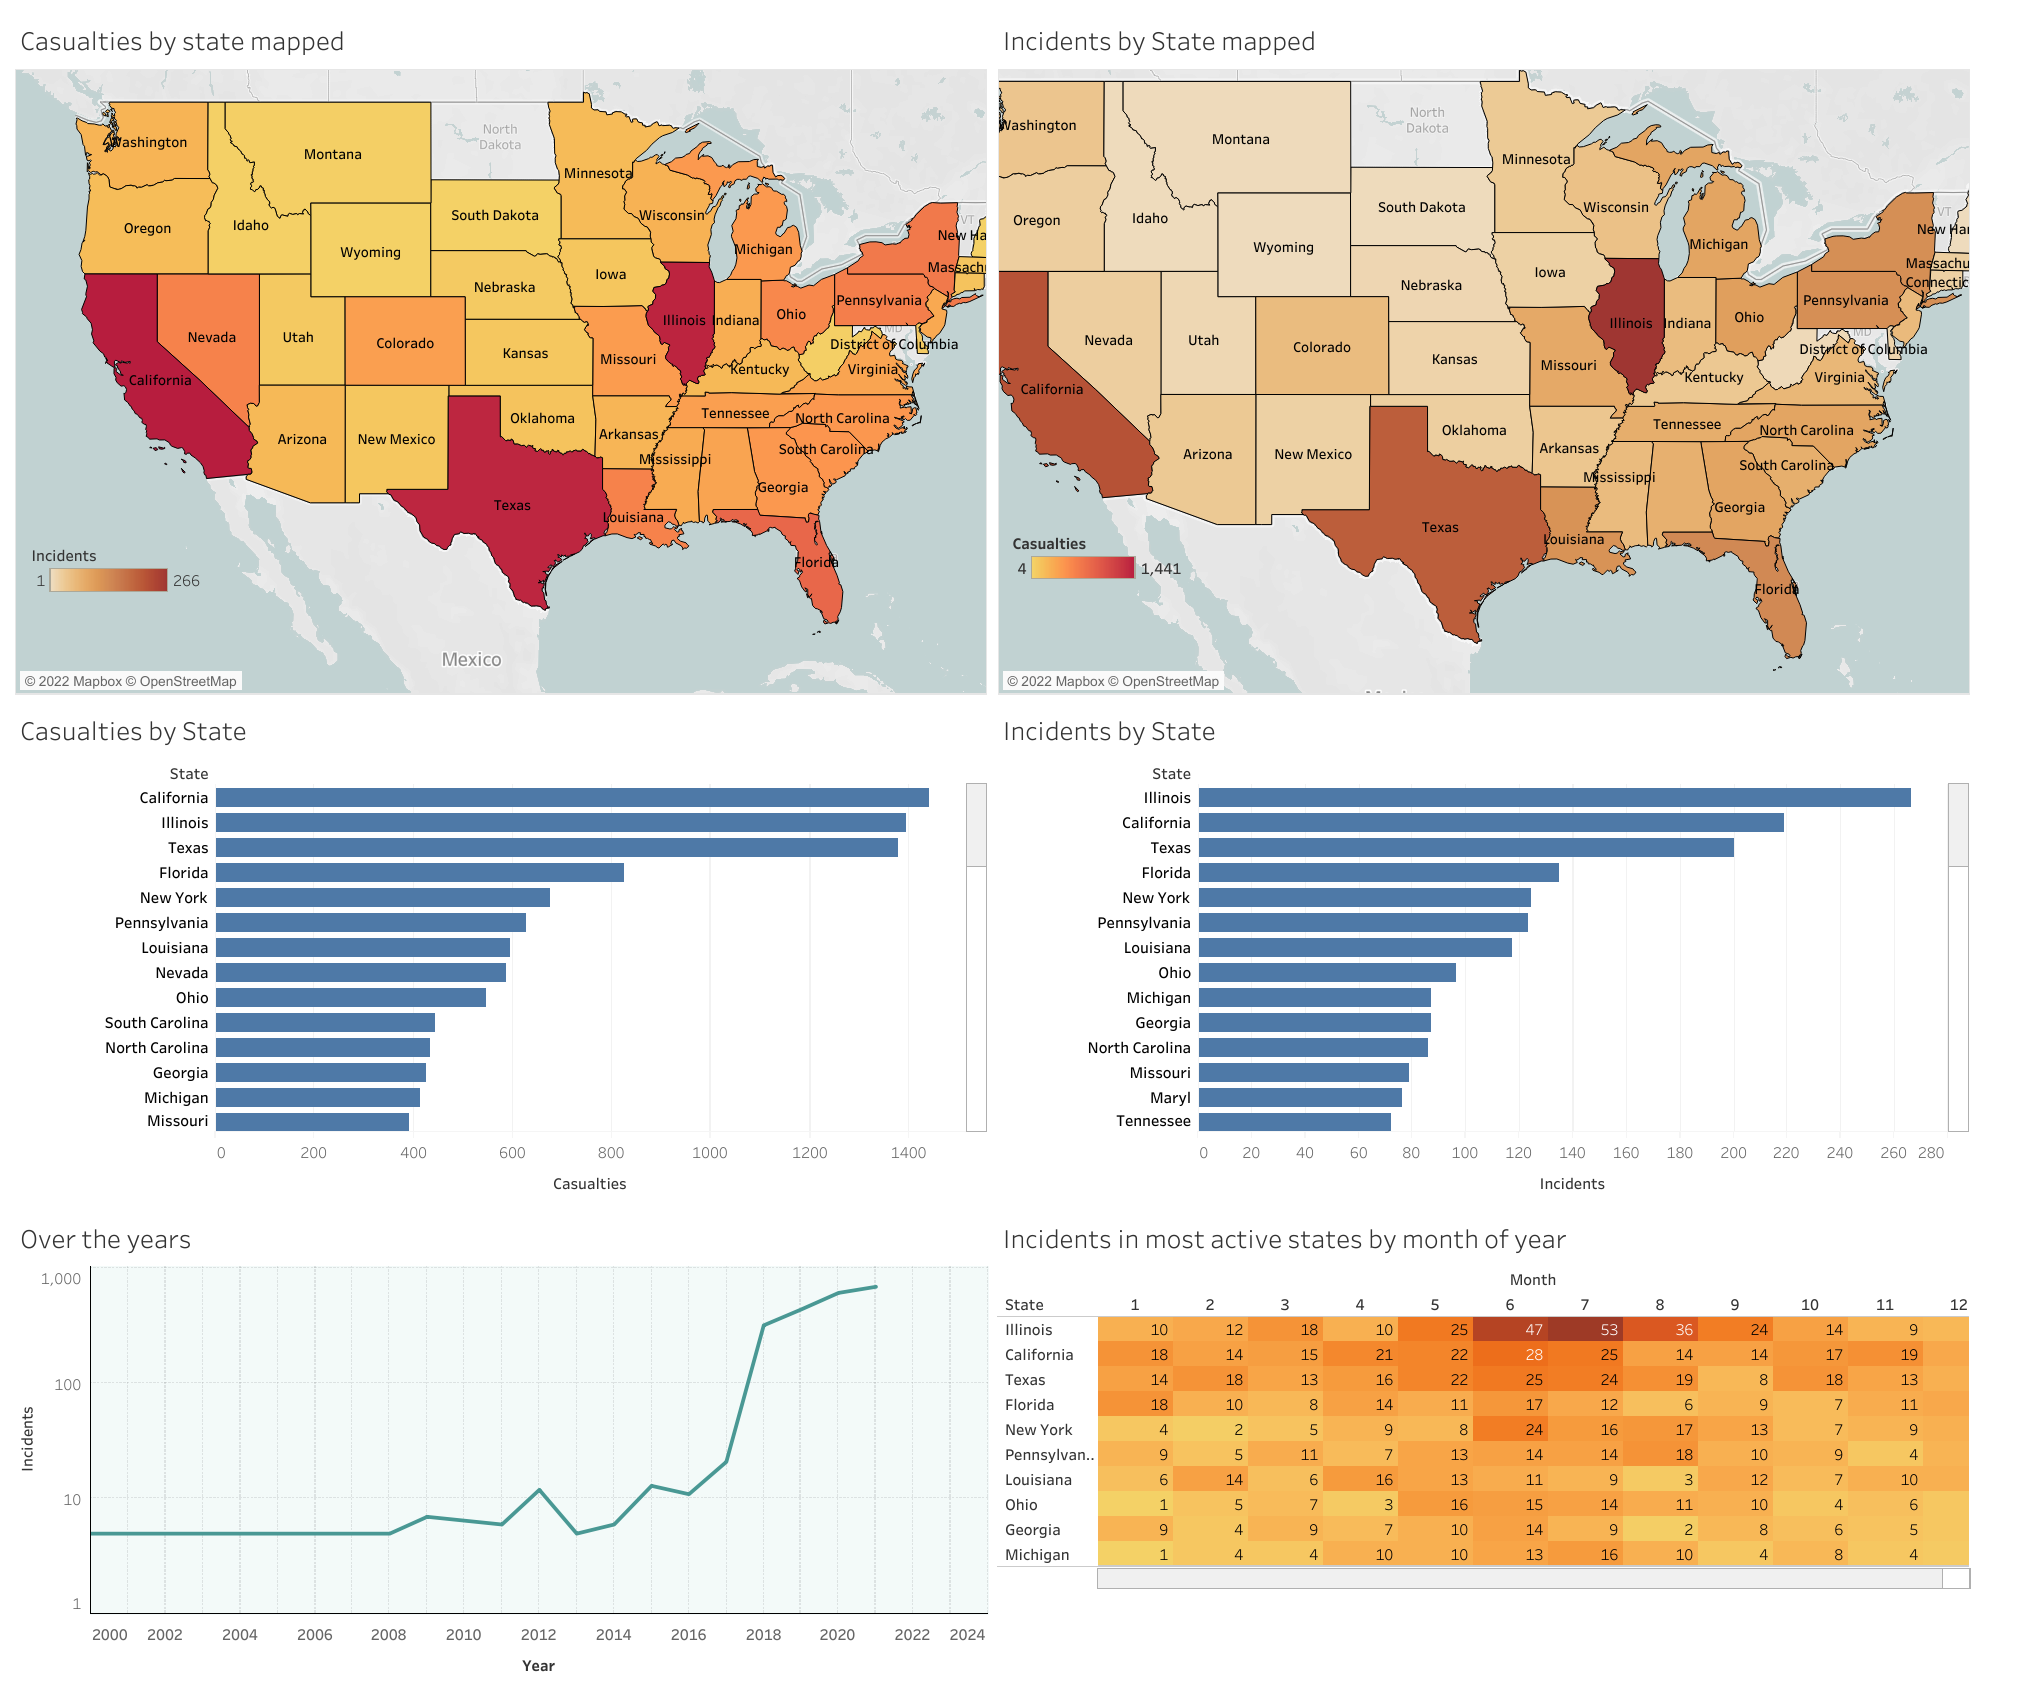